In [24]:
import sklearn
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
r=dir(datasets)
print(r)
iris=datasets.load_iris()
x=pd.DataFrame(iris.data)
x.columns=['sepal_length','sepal_width','petal_length','petal_width']
y=pd.DataFrame(iris.target)
y.columns=['targets']
print((y.columns.ndim))


['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make

In [25]:
scale = StandardScaler()
scaled_x = scale.fit_transform(x)
xs=pd.DataFrame(scaled_x,columns=x.columns)



Accuracy using GNM =  0.9666666666666667


Text(0, 0.5, 'Petal width')

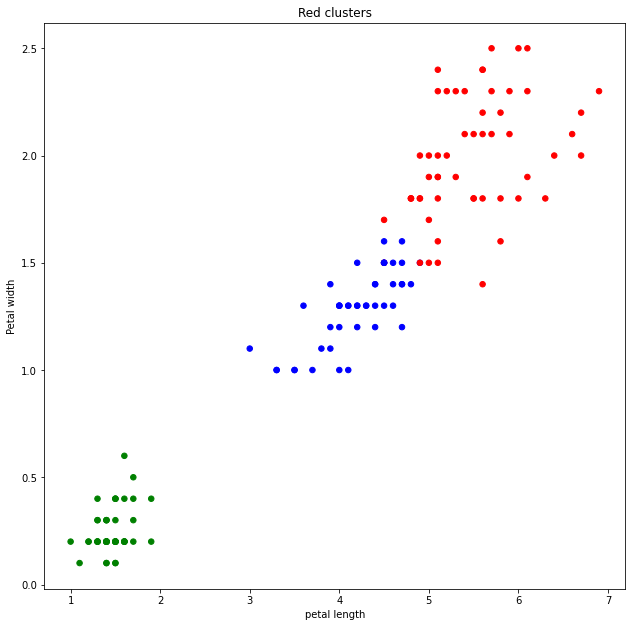

In [28]:
from sklearn.mixture import GaussianMixture
gnm=GaussianMixture(n_components=3)
gnm.fit(xs)
gnm_y=gnm.predict(xs)
clusters=gnm.fit_predict(x)
labels=np.zeros_like(clusters)

for i in range(3):
    cat=(gnm_y==i)
    labels[cat]=mode(iris.target[cat])[0]

acc=accuracy_score(iris.target,labels)
print('Accuracy using GNM = ',acc)

plt.figure(figsize=(25,25))
colormap=np.array(['red','green','blue'])
plt.subplot(2,2,3)
plt.scatter(x.petal_length,x.petal_width,c= colormap[gnm_y],s=30)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.title('Red clusters')
plt.xlabel('petal length')
plt.ylabel('Petal width')
